# Fake News Detector - EDA Analysis
The notebook covers the Explanatory Data Analysis of the ISOT Fake News detection dataset, provided by Kaggle.

The Kaggle Link : *https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset*



In [2]:
# Step 1: Install required packages
!pip install kagglehub[hf-datasets] datasets seaborn wordcloud pandas numpy --quiet

In [3]:
# Step 2: Import libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from wordcloud import WordCloud
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import kagglehub
from kagglehub import KaggleDatasetAdapter
from datasets import Dataset
from pathlib import Path

## Data loading from Kaggle

In [5]:
# Load datasets directly from Kaggle
def load_dataset():
    print("⏳ Loading datasets from Kaggle...")
    fake_ds = kagglehub.load_dataset(
        KaggleDatasetAdapter.HUGGING_FACE,
        "clmentbisaillon/fake-and-real-news-dataset",
        "Fake.csv",
        hf_kwargs={"split": "all"}
    )

    true_ds = kagglehub.load_dataset(
        KaggleDatasetAdapter.HUGGING_FACE,
        "clmentbisaillon/fake-and-real-news-dataset",
        "True.csv",
        hf_kwargs={"split": "all"}
    )

    # Convert to pandas DataFrames
    fake_df = fake_ds.to_pandas()
    fake_df['label'] = 1  # Fake news

    true_df = true_ds.to_pandas()
    true_df['label'] = 0  # Real news

    # Combine datasets
    df = pd.concat([fake_df, true_df], ignore_index=True)

    print(f"✅ Dataset loaded: {len(df)} records")
    print(f"   - Fake news: {len(fake_df)} samples")
    print(f"   - Real news: {len(true_df)} samples")

    return df

# Load the data
full_df = load_dataset()

# Preview
full_df.sample(5)

⏳ Loading datasets from Kaggle...


<ipython-input-5-08a61bc710a0>:4: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  fake_ds = kagglehub.load_dataset(
<ipython-input-5-08a61bc710a0>:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  true_ds = kagglehub.load_dataset(


✅ Dataset loaded: 44898 records
   - Fake news: 23481 samples
   - Real news: 21417 samples


,title,text,subject,date,label
29035,Labor nominee Puzder's company wins discrimina...,WASHINGTON (Reuters) - Labor secretary nominee...,politicsNews,"February 9, 2017",0
35760,Putin says U.S. gripped by fabricated spymania...,MOSCOW (Reuters) - Russian President Vladimir ...,worldnews,"December 14, 2017",0
11975,OBAMA FINALLY BUILDS BORDER WALL…But There’s O...,President Obama blasted Republican presidentia...,politics,"Jan 7, 2017",1
24389,Trump does not recall suggestion of Putin meet...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"November 1, 2017",0
23345,SUNDAY SCREENING: CIA Secret Experiments (2008),"21st Century Wire says Every Sunday, our edito...",Middle-east,"May 22, 2016",1


## Explanatory Data Analysis

In [6]:
# Basic dataset stats
print("\n📊 Dataset Statistics:")
print(full_df.info())
print("\nLabel Distribution:")
print(full_df['label'].value_counts())


📊 Dataset Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None

Label Distribution:
label
1    23481
0    21417
Name: count, dtype: int64


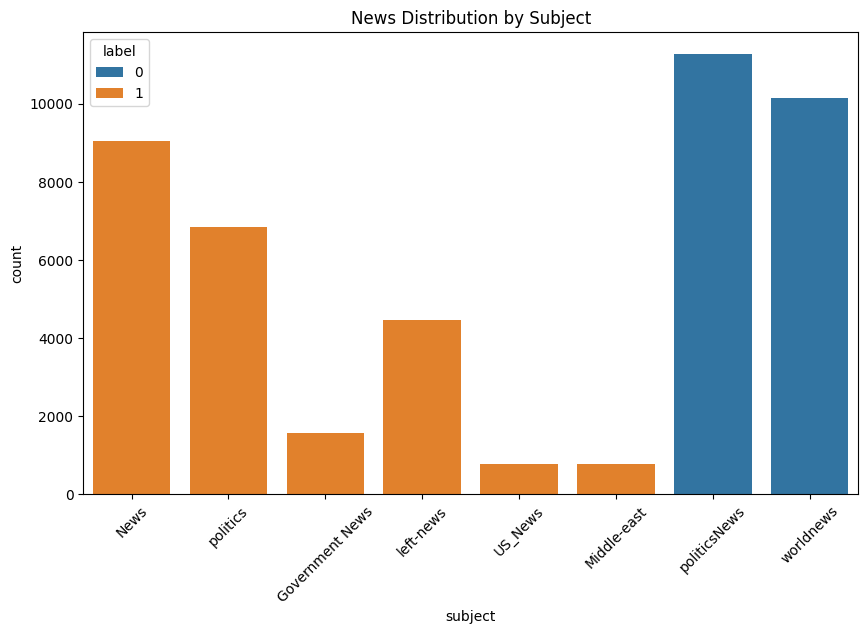

In [7]:
# Subject distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=full_df, x='subject', hue='label')
plt.title('News Distribution by Subject')
plt.xticks(rotation=45)
plt.show()

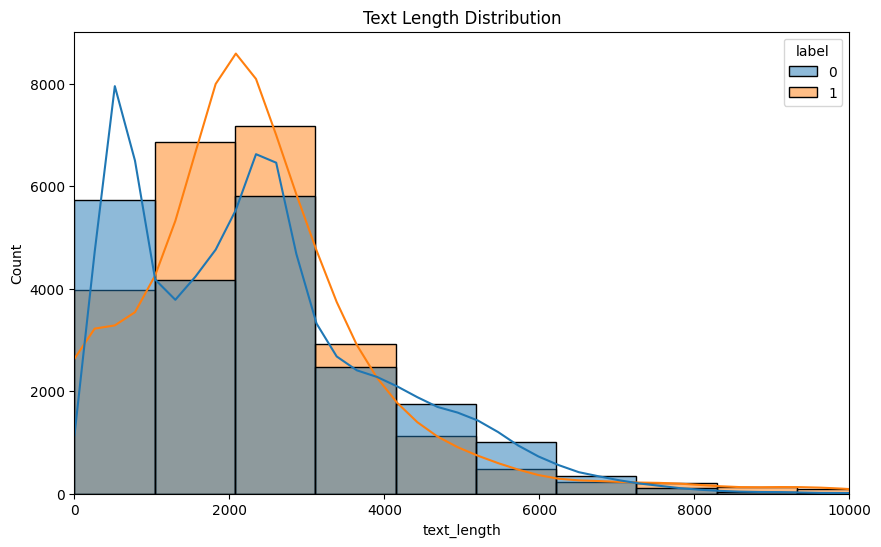

In [8]:
# Text length analysis
full_df['text_length'] = full_df['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(data=full_df, x='text_length', hue='label', bins=50, kde=True)
plt.title('Text Length Distribution')
plt.xlim(0, 10000)  # Limit to 10k characters for better visualization
plt.show()